# Tanimoto Similarity Score

The Tanimoto similarity score is a commonly used measure for calculating the structural similarity between molecules. RDKit is a popular Python library that provides tools for working with computational chemistry.

In [2]:
from rdkit import Chem
from rdkit import DataStructs
import pandas as pd

#carregam el csv amb els lligands

df = pd.read_csv('../Data/NRAS_SMILES_features.csv')

# Cream una llista buida
results = []

# lop per fer totes les combinacions possibles
for i in range(len(df)):
    mol1 = Chem.MolFromSmiles(df.loc[i, 'SMILES'])
    fp1 = Chem.RDKFingerprint(mol1)
    
    for j in range(i+1, len(df)):
        mol2 = Chem.MolFromSmiles(df.loc[j, 'SMILES'])
        fp2 = Chem.RDKFingerprint(mol2)
        
        similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
        results.append((i, j, similarity))

# Cream un data frame amb 
columns = ['Mol1', 'Mol2', 'Similarity']
df_results = pd.DataFrame(results, columns=columns)

print(df_results)

#guardam el data frame 
df_results.to_csv('../Results/similarity.csv', index=False)


        Mol1  Mol2  Similarity
0          0     1    0.954669
1          0     2    0.938462
2          0     3    0.770980
3          0     4    0.889984
4          0     5    0.948649
...      ...   ...         ...
166748   574   576    0.879493
166749   574   577    0.523710
166750   575   576    0.898721
166751   575   577    0.521288
166752   576   577    0.515910

[166753 rows x 3 columns]


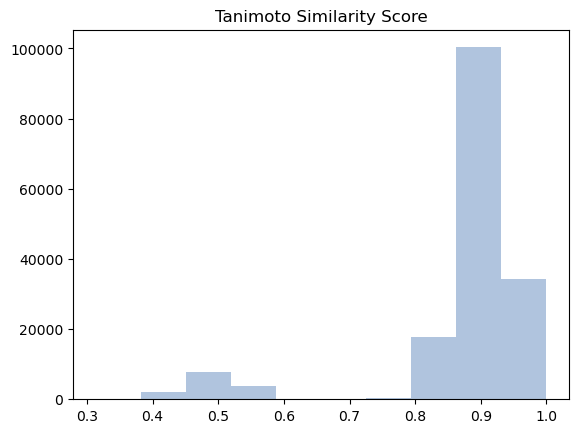

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df_results = pd.read_csv('../Results/similarity.csv')

fig, ax = plt.subplots()
ax.hist(df_results['Similarity'], color = "lightsteelblue")
ax.set_title('Tanimoto Similarity Score')

plt.savefig('../Results/Figures/Tanimoto_Hist.png', dpi=300) # saving the plot

plt.show()

